<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/ML_AI24_HT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [7]:
!wget --no-check-certificate https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0 -O train_transaction.csv
!wget --no-check-certificate https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0 -O train_identity.csv
!wget --no-check-certificate https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0 -O test_transaction.csv
!wget --no-check-certificate https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0 -O test_identity.csv
!wget --no-check-certificate https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0 -O sample_submission.csv

--2025-02-22 15:05:28--  https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0 [following]
--2025-02-22 15:05:29--  https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccd71f867eba1a93553e1686a73.dl.dropboxusercontent.com/cd/0/inline/Ckn2MXT0XtCjYXcnmFRfiJM-OvtCss4fwN41nVnTjKmh2JfrAO4KvrZ1rHAkVX_7NuqFgUSO_kSW6ZZPQggLtqP7EIOroyXgn5qD6CFEi3x-Z9tgAtZyUfXWVA0ffpdSYTs3Q5pXuCsAcIja4sRwn372/file# [following]
--2025-02-22 15:05:29--  https://uccd71f867eba1a93553e1686a73.dl.dropboxusercontent.c

In [2]:
!pip install catboost -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
ydata-profiling 4.12.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.15.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from catboost import CatBoostClassifier
import pandas as pd
import os
from tqdm import tqdm

INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [2]:
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

In [3]:
object_cols = []
for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
    if df_train[col].dtype == 'O':
      object_cols.append(idx)

431it [00:00, 70184.61it/s]


In [17]:
X_train = df_train.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(iterations=1000, task_type='GPU')
cb.fit(X_train, y_train, object_cols, )

Learning rate set to 0.02419
0:	learn: 0.6513604	total: 260ms	remaining: 4m 19s
1:	learn: 0.6120788	total: 440ms	remaining: 3m 39s
2:	learn: 0.5761233	total: 624ms	remaining: 3m 27s
3:	learn: 0.5425908	total: 829ms	remaining: 3m 26s
4:	learn: 0.5115539	total: 1.02s	remaining: 3m 23s
5:	learn: 0.4829501	total: 1.22s	remaining: 3m 21s
6:	learn: 0.4569994	total: 1.37s	remaining: 3m 14s
7:	learn: 0.4330281	total: 1.53s	remaining: 3m 9s
8:	learn: 0.4102150	total: 1.72s	remaining: 3m 9s
9:	learn: 0.3890099	total: 1.86s	remaining: 3m 3s
10:	learn: 0.3694425	total: 2.06s	remaining: 3m 4s
11:	learn: 0.3523464	total: 2.31s	remaining: 3m 10s
12:	learn: 0.3361111	total: 2.5s	remaining: 3m 9s
13:	learn: 0.3205342	total: 2.68s	remaining: 3m 9s
14:	learn: 0.3065157	total: 2.85s	remaining: 3m 7s
15:	learn: 0.2941004	total: 3.07s	remaining: 3m 8s
16:	learn: 0.2807114	total: 3.24s	remaining: 3m 7s
17:	learn: 0.2691790	total: 3.85s	remaining: 3m 30s
18:	learn: 0.2592435	total: 4.01s	remaining: 3m 26s
19:

In [18]:
predictions = cb.predict_proba(df_test.fillna(''))

In [21]:
predictions

array([[0.99126024, 0.00873976],
       [0.920679  , 0.079321  ],
       [0.96716727, 0.03283273],
       ...,
       [0.99493803, 0.00506197],
       [0.96079573, 0.03920427],
       [0.97889254, 0.02110746]])

In [22]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.head()

,TransactionID,isFraud
0,3404559,0.008740
1,3404560,0.079321
2,3404561,0.032833
3,3404562,0.019349
4,3404563,0.130740


In [23]:
# Сохранение submission
sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

### Анализ целевой переменной

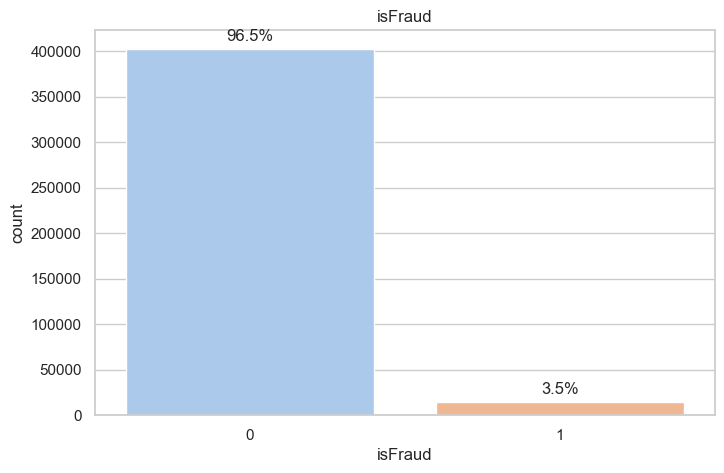

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid', palette='pastel')

plt.figure(figsize=(8,5))
ax = sns.countplot(x='isFraud', data=df_train)
total = len(df_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total
    ax.annotate(percentage, (x, y), ha='center')
plt.title('isFraud')
plt.show()

Лень, конечно, писать выводы, но тут явно видим дизбаланс классов, что ожидаемо. Работаем!

### Анализ пропусков

In [5]:
sorted(
    dict(
        df_train.isnull().sum() / len(df_train)
    ).items(), 
    key=lambda x: -x[1]
)

[('id_24', 0.9913209869742958),
 ('id_25', 0.9905881564042447),
 ('id_07', 0.9905522333370853),
 ('id_08', 0.9905522333370853),
 ('id_26', 0.9905450487236535),
 ('id_21', 0.9905402589813656),
 ('id_22', 0.9905306794967896),
 ('id_23', 0.9905306794967896),
 ('id_27', 0.9905306794967896),
 ('D7', 0.9354678021549051),
 ('dist2', 0.9298638036780431),
 ('id_18', 0.9179301607676998),
 ('D13', 0.8935096597127592),
 ('D14', 0.8914165423329398),
 ('D12', 0.8856281387779931),
 ('id_03', 0.8814538783740741),
 ('id_04', 0.8814538783740741),
 ('D6', 0.8729281371015832),
 ('D8', 0.8645604573245936),
 ('D9', 0.8645604573245936),
 ('id_09', 0.8645604573245936),
 ('id_10', 0.8645604573245936),
 ('id_33', 0.8615309453274866),
 ('id_30', 0.8512880814447779),
 ('id_32', 0.8512401840218987),
 ('id_34', 0.8511156507224129),
 ('id_14', 0.8465558160643166),
 ('V138', 0.8431455195553204),
 ('V139', 0.8431455195553204),
 ('V140', 0.8431455195553204),
 ('V141', 0.8431455195553204),
 ('V142', 0.8431455195553204),

In [6]:
from functools import reduce

threshold = 0.7

d = sorted(
    dict(
        df_train.isnull().sum() / len(df_train)
    ).items(), 
    key=lambda x: -x[1]
)

count_ = sum([1 if nulls_ratio > threshold else 0 for name, nulls_ratio in d])


In [7]:
count_ / len(df_train.columns)

0.48148148148148145

Есть ~48% столбцов с кучей пропусков (больше 70%), такие, наверное, лучше дропнуть

### Заполнение пропусков

In [8]:
missing = pd.DataFrame({
    'missing_count': df_train.isnull().sum(),
    'missing_ratio': df_train.isnull().mean()
}).sort_values('missing_ratio', ascending=False)

cols_to_drop = missing[missing['missing_ratio'] > threshold].index
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)

num_cols = df_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_train.select_dtypes(include='object').columns.tolist()

for col in num_cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())

for col in cat_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    
num_cols = df_test.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_test.select_dtypes(include='object').columns.tolist()
    
for col in num_cols:
    df_test[col] = df_test[col].fillna(df_train[col].median())

for col in cat_cols:
    df_test[col] = df_test[col].fillna(df_train[col].mode()[0])

### Анализ категориальных признаков

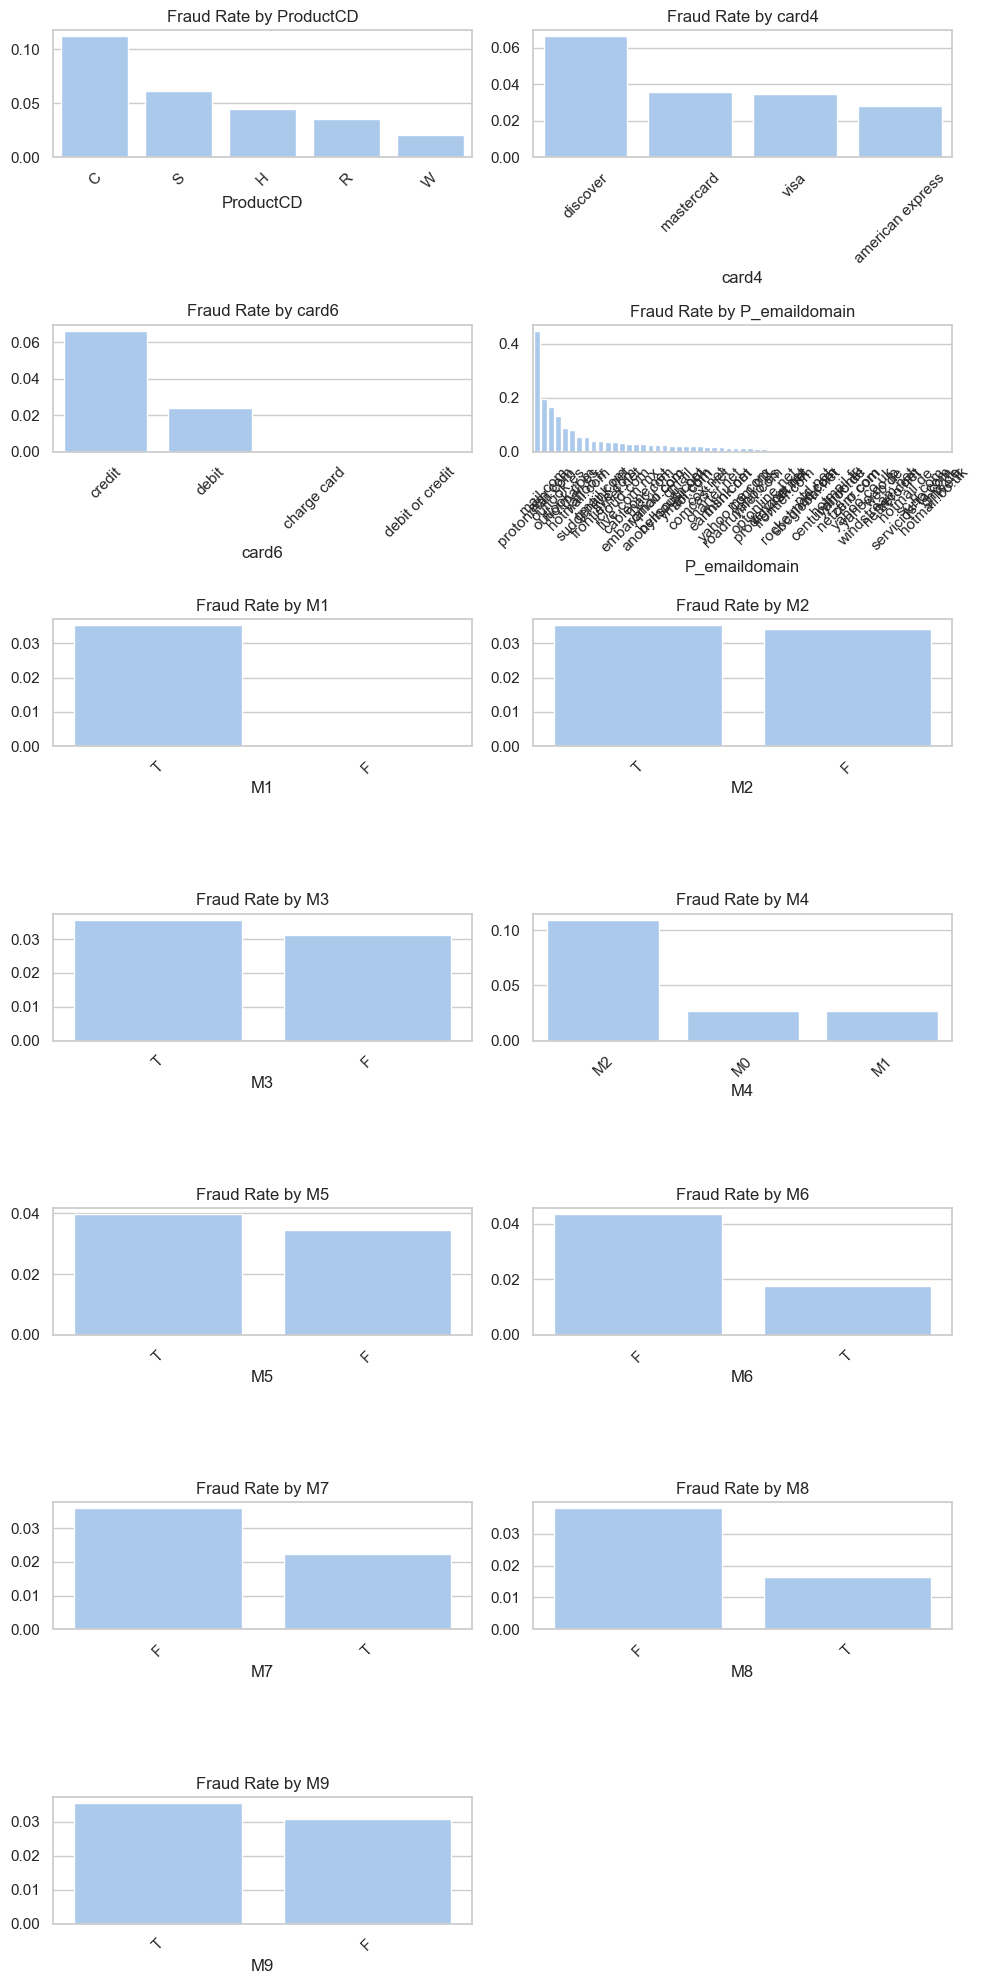

In [74]:
cat_features = cat_cols

plt.figure(figsize=(10,20))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(7,2,i)
    temp = df_train.groupby(feature)['isFraud'].mean().sort_values(ascending=False)
    sns.barplot(x=temp.index, y=temp.values)
    plt.title(f'Fraud Rate by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Можно увидеть, что среди них есть зависимость с таргетом

### Корреляционный анализ

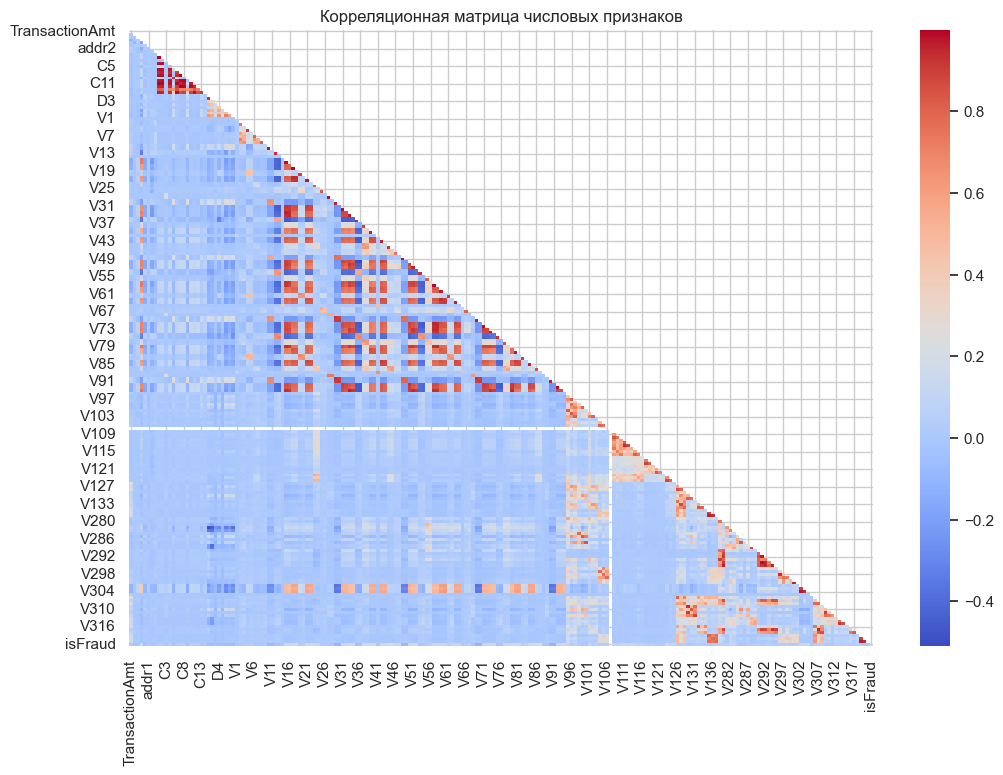

In [9]:
corr_matrix = df_train[num_cols + ['isFraud']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, 
            # annot=True, 
            fmt='.2f', 
            mask=mask,
            cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

Офигенные корреляции, ща чистить будем)

In [10]:
threshold = 0.9

upper = corr_matrix.abs().where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [11]:
len(to_drop) / len(num_cols)

0.319047619047619

In [12]:
df_train = df_train.drop(to_drop, axis=1)
df_test = df_test.drop(to_drop, axis=1)

Еще ~32% столбцов подрежем среди оставшихся действительных фичей

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [144]:
X, y = df_train.drop('isFraud', axis=1), df_train['isFraud']

cat_features = df_train.select_dtypes(include='object').columns.tolist()

X[cat_features] = X[cat_features].astype('category')

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

folds = 5
cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

In [145]:
models = [
    {
        'name': 'CatBoost',
        'model': CatBoostClassifier(cat_features=cat_features, task_type='GPU', verbose=0),
        'params': {'iterations': 1000}
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(
            scale_pos_weight=27,  # для баланса классов (96.5/3.5 ≈ 27)
            max_depth=6,
            learning_rate=0.05, 
            device="cuda",
            enable_categorical=True
        ),
        'params': {}
    },
    {
        'name': 'LightGBM',
        'model': LGBMClassifier(
            class_weight='balanced',
            num_leaves=31,
            learning_rate=0.1,
            device="gpu",
        ),
        'params': {}
    }
]

In [148]:
results = []

for model_config in models:
    model = model_config['model']
    model_name = model_config['name']
    
    cv_scores_auc = []
    cv_scores_f1 = []
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]
        X_val = X_train.iloc[val_idx]
        y_val = y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        preds = model.predict_proba(X_val)[:,1]
        
        cv_scores_auc.append(roc_auc_score(y_val, preds))
    
    mean_cv_auc = np.mean(cv_scores_auc)
    
    model.fit(X_train, y_train)
    val_preds = model.predict_proba(X_val)[:,1]
    val_auc = roc_auc_score(y_val, val_preds)
    
    results.append({
        'Model': model_name,
        'CV AUC': f"{mean_cv_auc:.4f}",
        'Test AUC': f"{val_auc:.4f}",
        'Params': str(model.get_params())
    })

Выходов нет, так как там какие-то модели падали, и чтоб все не перезапускать с нуля я просто result комментил и продолжал после исправлений

In [147]:
results

[{'Model': 'CatBoost',
  'CV AUC': '0.9032',
  'Test AUC': '0.9117',
  'Params': "{'verbose': 0, 'task_type': 'GPU', 'cat_features': ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']}"},
 {'Model': 'XGBoost',
  'CV AUC': '0.9102',
  'Test AUC': '0.9270',
  'Params': "{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': True, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_par

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

linear_model=[
    {
        'name': 'Logistic Regression',
        'model': model,
        'params': {}
    }
]

for model_config in linear_model:
    model = model_config['model']
    model_name = model_config['name']
    
    cv_scores_auc = []
    cv_scores_f1 = []
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]
        X_val = X_train.iloc[val_idx]
        y_val = y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        preds = model.predict_proba(X_val)[:,1]
        
        cv_scores_auc.append(roc_auc_score(y_val, preds))
    
    mean_cv_auc = np.mean(cv_scores_auc)
    
    model.fit(X_train, y_train)
    val_preds = model.predict_proba(X_val)[:,1]
    val_auc = roc_auc_score(y_val, val_preds)
    
    results.append({
        'Model': model_name,
        'CV AUC': f"{mean_cv_auc:.4f}",
        'Test AUC': f"{val_auc:.4f}",
        'Params': str(model.get_params())
    })

C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [153]:
results_df = pd.DataFrame(results)

In [156]:
results_df

,Model,CV AUC,Test AUC,Params
0,CatBoost,0.9032,0.9117,"{'verbose': 0, 'task_type': 'GPU', 'cat_featur..."
1,XGBoost,0.9102,0.9270,"{'objective': 'binary:logistic', 'base_score':..."
2,LightGBM,0.9271,0.9463,"{'boosting_type': 'gbdt', 'class_weight': 'bal..."
3,Logistic Regression,0.7800,0.7905,"{'memory': None, 'steps': [('preprocessor', Co..."


Сразу видно, что деревья над градиентным бустингом показали результаты лучше в отличие от линейной модели, которая показала результаты хуже, так как похоже в данных есть нелинейность) (я еще не скейлил дейст вительные фичи)

LightGMB показал результаты лучше остальных, а катбуст в дефолте результаты показал хуже всех, может имеет смысл покрутить ему гиперпараметры, но это в конце, когда уже буду делать сабмиты

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [161]:
X, y = df_train.drop('isFraud', axis=1), df_train['isFraud']

cat_features = df_train.select_dtypes(include='object').columns.tolist()

X[cat_features] = X[cat_features].astype('category')

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

num_features = X_train.select_dtypes(include=np.number).columns.tolist()
X_train_num = X_train[num_features]
X_val_num = X_val[num_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_val_scaled = scaler.transform(X_val_num)

models = {
    'Isolation Forest': IsolationForest(contamination=0.035, random_state=42),
    'One-Class SVM': OneClassSVM(nu=0.035)
}

anomaly_results = []

for name, model in models.items():
    if name == 'Local Outlier Factor':
        preds = model.fit_predict(X_train_scaled)
    else:
        model.fit(X_train_scaled)
        preds = model.predict(X_val_scaled)
    
    preds = np.where(preds == -1, 1, 0)
    
    if name != 'Local Outlier Factor':
        auc = roc_auc_score(y_val, preds)
        anomaly_results.append({
            'Method': name,
            'Test AUC': f"{auc:.4f}"
        })

In [162]:
results_df = pd.DataFrame(anomaly_results)
print(results_df)

             Method Test AUC
0  Isolation Forest   0.5665
1     One-Class SVM   0.5698


In [163]:
detector = IsolationForest(contamination=0.035, random_state=42)
anomalies = detector.fit_predict(X_train_scaled)
X_train_clean = X_train[anomalies == 1]
y_train_clean = y_train[anomalies == 1]

model = CatBoostClassifier(
    iterations=1000,
    cat_features=cat_features, 
    task_type='GPU', 
    verbose=0
)
model.fit(X_train_clean, y_train_clean)

test_preds = model.predict_proba(X_val)[:,1]
auc_clean = roc_auc_score(y_val, test_preds)
print(f"AUC после удаления аномалий: {auc_clean:.4f}")

AUC после удаления аномалий: 0.9056


Вроде стало чуть лучше чем было (в пределах погрешности правда)

In [164]:
X_train['is_anomaly'] = anomalies
X_val['is_anomaly'] = detector.predict(scaler.transform(X_val_scaled))

# Обучение CatBoost с новым признаком
model = CatBoostClassifier(
    iterations=1000,
    task_type='GPU',
    cat_features=cat_features + ['is_anomaly'], 
    verbose=0)
model.fit(X_train, y_train)

# Оценка
val_preds = model.predict_proba(X_val)[:,1]
auc_flag = roc_auc_score(y_val, val_preds)
print(f"AUC с флагом аномалий: {auc_flag:.4f}")

C:\Users\bende\AppData\Local\Temp\ipykernel_11100\44606669.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['is_anomaly'] = anomalies
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\bende\AppData\Local\Temp\ipykernel_11100\44606669.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val['is_anomaly'] = detector.predict(scaler.transform(X_val_scaled))


AUC с флагом аномалий: 0.9066


Тут качество еще чуть подросло, в целом можно сказать, что в аномалиях есть какая-то информация, которая помогает катбусту чуть лучше разобраться

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from tqdm import tqdm

In [18]:
X, y = df_train.drop('isFraud', axis=1), df_train['isFraud']

cat_features = df_train.select_dtypes(include='object').columns.tolist()

X[cat_features] = X[cat_features].astype('category')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=np.number))

n_clusters = 5

methods = ['kmeans', 'dbscan']
results = []

for method in tqdm(methods):
    if method == 'kmeans':
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'dbscan':
        clusterer = DBSCAN(eps=3.0, min_samples=10)
    
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)
    clusters = clusterer.fit_predict(X_pca)
    
    X_new = X.copy()
    X_new[f'{method}_cluster'] = clusters
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_new, y, 
        test_size=0.2, 
        stratify=y,
        random_state=42
    )
        
    model = CatBoostClassifier(
        iterations=1000,
        task_type='GPU',
        cat_features=cat_features + [f'{method}_cluster'], 
        verbose=0)
    cv_auc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc'))
    
    model.fit(X_train, y_train)
    val_preds = model.predict_proba(X_val)[:,1]
    val_auc = roc_auc_score(y_val, val_preds)
    
    results.append({
        'Method': method.upper(),
        'CV AUC': f"{cv_auc:.4f}",
        'Test AUC': f"{val_auc:.4f}"
    })

100%|██████████| 2/2 [27:18<00:00, 819.14s/it]


In [24]:
pd.DataFrame(results[:2])

,Method,CV AUC,Test AUC
0,KMEANS,0.9032,0.9062
1,DBSCAN,0.9040,0.9070


DBSCAN дал небольшой прирост, а KMEANS вообще ничего не дал, но тут, наверное, нужно больше кластеров (5 маловато), но это точно стоит искать метод, который на гпу может работать, а то это анриал обучать на цпу (я чуть с ума не сошел, когда он еще работал 2 часа и упал)

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [26]:
import h2o
from h2o.automl import H2OAutoML

In [28]:
df_train.to_csv('train_automl.csv')

In [31]:
h2o.init()

In [33]:
hf = h2o.H2OFrame(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
predictors = hf.columns
predictors.remove('isFraud')
hf['isFraud'] = hf['isFraud'].asfactor()

In [36]:
aml = H2OAutoML(
    max_runtime_secs=3600,
    seed=42,
    stopping_metric='AUC',
    sort_metric='AUC'
)

aml.train(
    x=predictors,
    y='isFraud',
    training_frame=hf
)

AutoML progress: |█
23:03:32.548: AutoML: XGBoost is not available; skipping it.
23:03:32.579: _train param, Dropping bad and constant columns: [V107]

██████
23:06:41.702: _train param, Dropping bad and constant columns: [V107]

████
23:11:24.393: _train param, Dropping unused columns: [V107]
23:11:27.424: _train param, Dropping bad and constant columns: [V107]

██
23:13:03.872: _train param, Dropping bad and constant columns: [V107]

███
23:16:38.911: _train param, Dropping bad and constant columns: [V107]

████
23:20:01.26: _train param, Dropping bad and constant columns: [V107]

███
23:23:22.120: _train param, Dropping unused columns: [V107]


23:23:24.870: _train param, Dropping unused columns: [V107]
23:23:27.840: _train param, Dropping bad and constant columns: [V107]

██
23:25:17.748: _train param, Dropping bad and constant columns: [V107]

███
23:28:41.378: _train param, Dropping bad and constant columns: [V107]

█
23:29:38.322: _train param, Dropping unused columns: [V107]




key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/29
# GBM base models (used / total),4/18
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/8
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [37]:
lb = aml.leaderboard
print(lb.head())

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_4_AutoML_1_20250222_230332     0.954225  0.0594993  0.77147                 0.174095  0.118351  0.014007
StackedEnsemble_AllModels_3_AutoML_1_20250222_230332     0.954173  0.0595082  0.771502                0.175095  0.118355  0.0140078
StackedEnsemble_AllModels_2_AutoML_1_20250222_230332     0.951637  0.0611281  0.761415                0.173407  0.119963  0.0143911
StackedEnsemble_AllModels_1_AutoML_1_20250222_230332     0.951603  0.0611254  0.761433                0.179313  0.119963  0.0143911
GBM_1_AutoML_1_20250222_230332                           0.949809  0.0641108  0.749364                0.183826  0.123348  0.0152148
StackedEnsemble_BestOfFamily_1_AutoML_1_20250222_230332  0.949808  0.0629244  0.749282                0.183919  0.122029  0.0148912
StackedEnsemble_BestOfFamily_4_AutoML_1_20250222_230332  0.949808  0.0629265 

In [39]:
kaggle_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [41]:
preds = aml.leader.predict(kaggle_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [48]:
predictions_df = h2o.as_list(preds['p1'])

C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [49]:
predictions_df

,p1
0,0.001675
1,0.010591
2,0.009288
3,0.001570
4,0.398644
...,...
172976,0.007939
172977,0.011548
172978,0.001947
172979,0.006141


In [50]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions_df['p1']})
sub.head()

,TransactionID,isFraud
0,3404559,0.001675
1,3404560,0.010591
2,3404561,0.009288
3,3404562,0.001570
4,3404563,0.398644


In [51]:
sub.to_csv('automl_submission.csv', index=False)

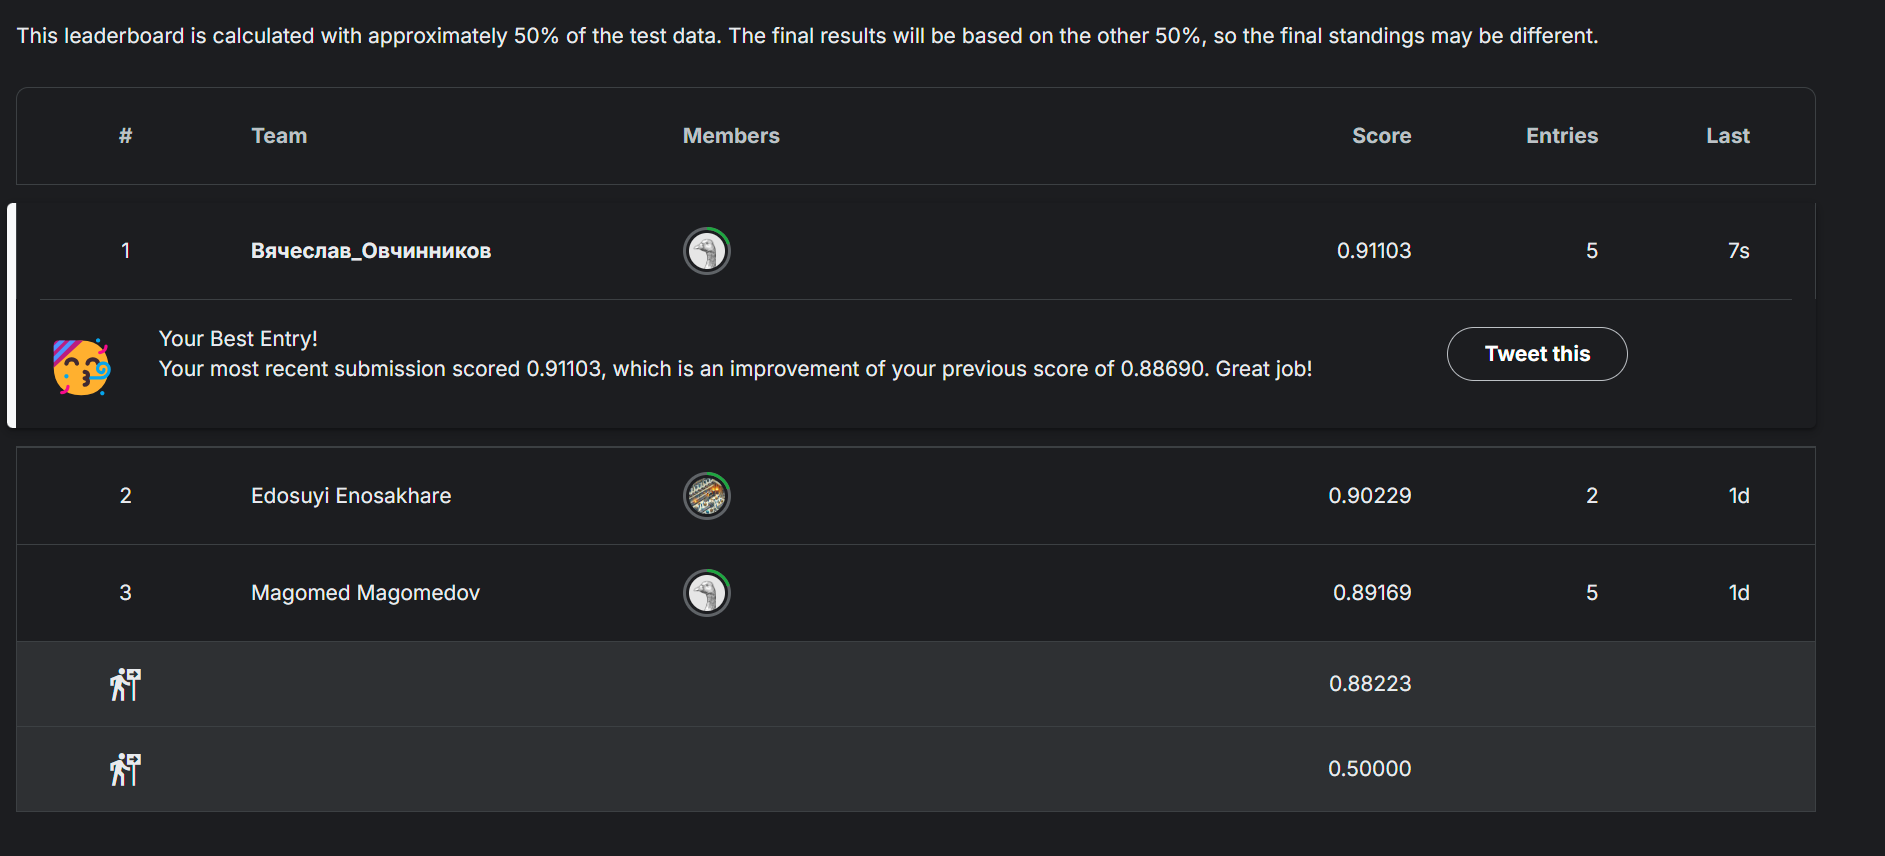

ЖЕСТКО, НО ОН МНЕ ЦПУ ЗАБИВАЛ В 100% ЦЕЛЫЙ ЧАС

А так удобно, конечно, что за тебя прога прогоняет разные алгоритмы, объединяет, ищет лучшую комбинацию, но запускать под виндой это все тяжело.... Плюс я не нашел как это запустить на гпу и это очень больно крутить на цпу.....

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

Пока скип, так как изначально на локалке все запускаю, может потом доделаю

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

Пока так)
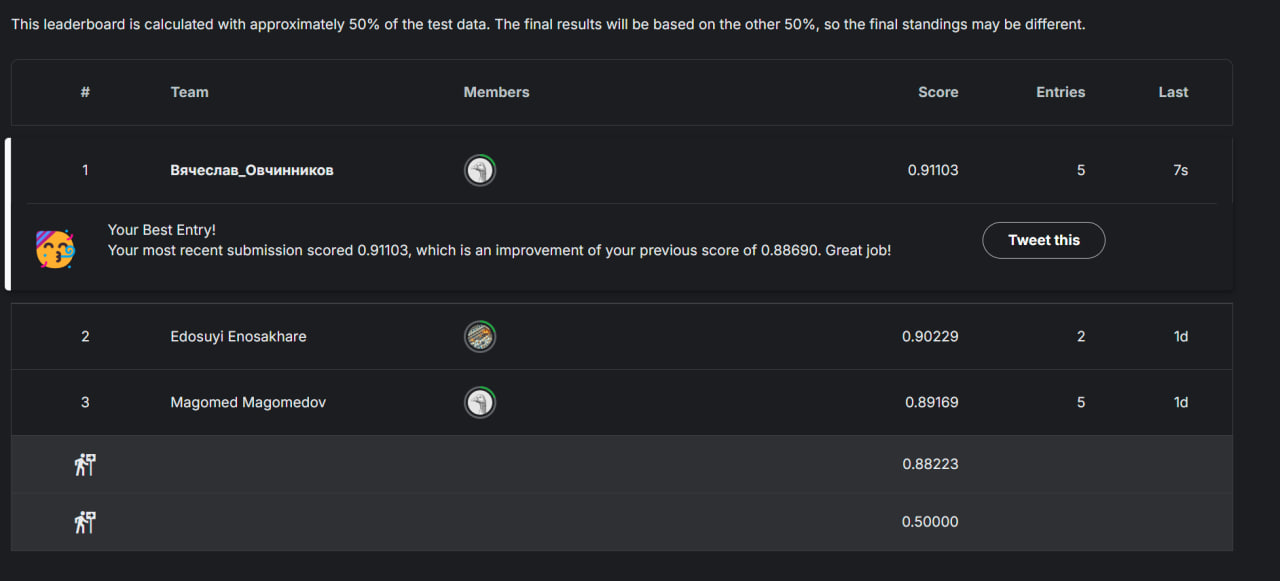

In [75]:
X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(
    cat_features=cat_features,
    iterations=10000, 
    task_type='GPU'
)
cb.fit(X_train, y_train)

Learning rate set to 0.003074
0:	learn: 0.6875582	total: 80.2ms	remaining: 13m 21s
1:	learn: 0.6819964	total: 138ms	remaining: 11m 28s
2:	learn: 0.6766267	total: 200ms	remaining: 11m 6s
3:	learn: 0.6713116	total: 497ms	remaining: 20m 41s
4:	learn: 0.6661731	total: 531ms	remaining: 17m 40s
5:	learn: 0.6607356	total: 563ms	remaining: 15m 38s
6:	learn: 0.6555467	total: 8.36s	remaining: 3h 18m 56s
7:	learn: 0.6502406	total: 8.39s	remaining: 2h 54m 43s
8:	learn: 0.6453204	total: 8.43s	remaining: 2h 36m 1s
9:	learn: 0.6402058	total: 8.47s	remaining: 2h 20m 58s
10:	learn: 0.6354945	total: 8.5s	remaining: 2h 8m 37s
11:	learn: 0.6304718	total: 8.53s	remaining: 1h 58m 22s
12:	learn: 0.6254968	total: 8.57s	remaining: 1h 49m 41s
13:	learn: 0.6208358	total: 8.6s	remaining: 1h 42m 14s
14:	learn: 0.6161367	total: 8.63s	remaining: 1h 35m 47s
15:	learn: 0.6115087	total: 8.73s	remaining: 1h 30m 45s
16:	learn: 0.6068258	total: 8.76s	remaining: 1h 25m 45s
17:	learn: 0.6019851	total: 8.79s	remaining: 1h 21

In [76]:
predictions = cb.predict_proba(df_test)

In [77]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.head()

,TransactionID,isFraud
0,3404559,0.010819
1,3404560,0.085735
2,3404561,0.031737
3,3404562,0.009023
4,3404563,0.167169


In [78]:
sub.to_csv('logner_train.csv', index=False) # 0.88849

0.88849 эххх не работает больше иттераций и бррррр

Хотя эта версия уже с чистками всяких плохих фичей, но увы и ах беда бедой

Еще можно попробовать крутую библиотеку, которая бьет градиентные бустинги по идее. Там что-то слои аттеншена посмотрим

In [12]:
pip install tabpfn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!git clone https://github.com/priorlabs/tabpfn-extensions.git
!pip install -e tabpfn-extensions

Cloning into 'tabpfn-extensions'...


Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///C:/Users/bende/Projects/VScodeProjects/%D1%83%D1%87%D0%B5%D0%B1%D0%B0/HW_ML_AI/hw7/tabpfn-extensions
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for tabpfn-extensions (pyproject.toml): started
  Building editable for tabpfn-extensions (pyproject.toml): finished with status 'done'
  Created wheel for tabpfn-extensions: filename=tabpfn_extensions-0.0.4-0.editable-py3-none-any.whl size=11365 sha256=6cde8fae04da91b20a46e189350c4b7ff

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.15.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier
from tabpfn_extensions.rf_pfn.utils import preprocess_data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
cat_features = df_train.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)
X = df_train.drop('isFraud', axis=1)
y = df_train['isFraud'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

# X_train = preprocessor.fit_transform(X_train)
# X_val = preprocessor.transform(X_val)

In [16]:
cat_indices = []
for column in cat_features:
    cat_indices += [df_train.columns.get_loc(column)]

In [17]:
from sklearn.metrics import roc_auc_score
from tabpfn import TabPFNClassifier

clf = TabPFNClassifier(ignore_pretraining_limits=True)
clf.fit(X_train, y_train)

C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\tabpfn\classifier.py:417: UserWarning: Number of samples 208779 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


TabPFNClassifier(ignore_pretraining_limits=True)

In [18]:
import torch
with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
    prediction_probabilities = clf.predict_proba(X_val[:100])
# print("ROC AUC:", roc_auc_score(y_val, prediction_probabilities[:, 1]))

OutOfMemoryError: CUDA out of memory. Tried to allocate 6.84 GiB. GPU 0 has a total capacity of 16.00 GiB of which 0 bytes is free. Of the allocated memory 27.95 GiB is allocated by PyTorch, and 209.94 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Не получилось))) Хз откуда мне столько видеопамяти взять брэээд